In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import time
from mpl_toolkits import mplot3d 
from mpl_toolkits.mplot3d import Axes3D
sb.set() # set the default Seaborn style for graphics
pd.options.mode.chained_assignment = None
scaler = MinMaxScaler()

<AxesSubplot:xlabel='OCEAN_DIST', ylabel='WATER_DIST'>

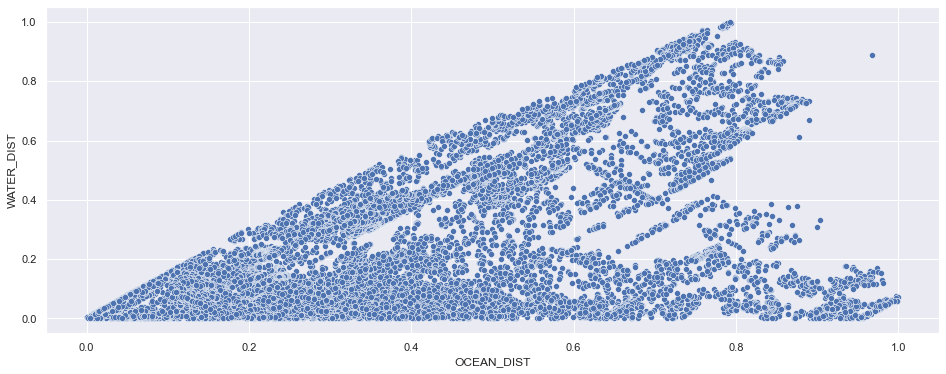

In [8]:
imported_data = pd.read_csv("miami_housing.csv") #import fresh data  
imported_data[["LATITUDE", "LONGITUDE", "TOT_LVG_AREA", "OCEAN_DIST", "WATER_DIST", "SALE_PRC"]] = scaler.fit_transform(imported_data[["LATITUDE", "LONGITUDE", "TOT_LVG_AREA", "OCEAN_DIST", "WATER_DIST", "SALE_PRC"]])
dataset = imported_data

plt.figure(figsize=(16, 6))
sb.scatterplot(data=dataset, x="OCEAN_DIST", y="WATER_DIST", palette="deep")

<AxesSubplot:xlabel='OCEAN_DIST', ylabel='SALE_PRC'>

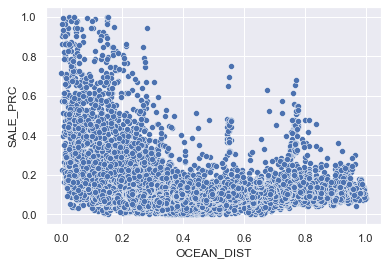

In [9]:
sb.scatterplot(data=dataset, x="OCEAN_DIST", y="SALE_PRC", palette="deep")

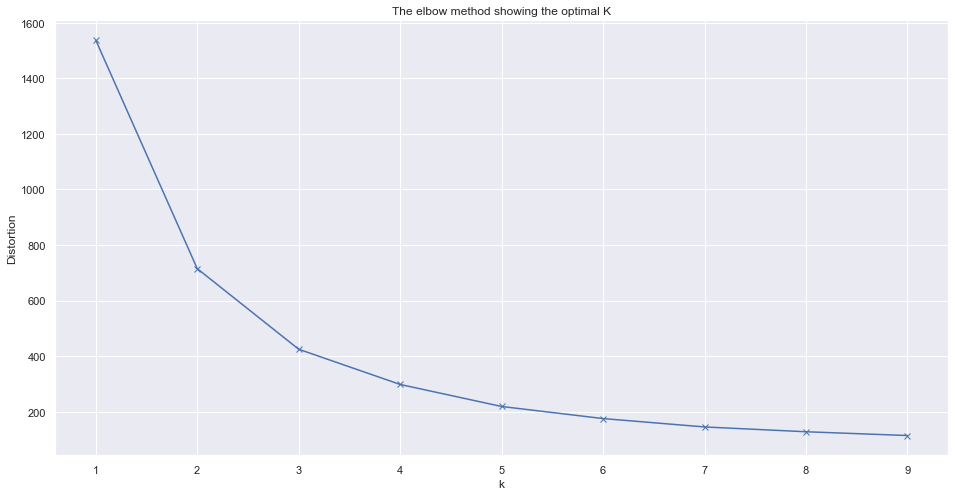

In [12]:

data = pd.DataFrame(dataset[['WATER_DIST', 'OCEAN_DIST']])
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The elbow method showing the optimal K')
plt.show()